In [70]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r"C:\Users\91820\OneDrive\Desktop\Downloads\satlog dataset\statlog.csv"
# Read the  dataset from the CSV file
df = pd.read_csv(file_path)

# Calculate mean for the column
mean_bp = df['trestbps'].mean()
print(f"Mean Bp: {mean_bp}")



Mean Bp: 131.34444444444443


# Local Dp

In [71]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame containing 'trestbps' and '_noisy' columns

# Generate Laplace noise
noise = np.random.laplace(loc=0, scale=1/0.5, size=len(df))

# Add noise to the '_noisy' column
df['_noisy'] = df['trestbps'] + noise

# Calculate the mean of the '_noisy' column
mean_noisy = df['_noisy'].mean()

# Calculate the absolute differences
df['abs_difflocaldp'] = np.abs(df['_noisy'] - mean_noisy)

# Calculate the Mean Absolute Error (MAE)
mae = df['abs_difflocaldp'].mean()

# Print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mae)

expected_mean=14.5
accuracy=(1-abs(mae-expected_mean)/expected_mean)*(100)
print("accuracy=",accuracy,"%")


Mean Absolute Error (MAE): 14.217967804962518
accuracy= 98.05495037905185 %


In [72]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'abs_diffresamplingnoise' is the name of the column
# Replace 'df' with your actual DataFrame variable if it's different
std_deviation = df['abs_difflocaldp'].std()

print(f"Standard Deviation of 'abs_diffresamplingnoise': {std_deviation}")
expected_stdofmean=11.0

accuracy=(1-abs(std_deviation-expected_stdofmean)/expected_stdofmean)*(100)
print("accuracy=",accuracy,"%")


Standard Deviation of 'abs_diffresamplingnoise': 11.354936205003543
accuracy= 96.77330722724051 %


# FxP Baseline

In [73]:
import numpy as np

# Parameters for Laplace distribution
loc = 0  # Mean of the Laplace distribution
scale = 1 / 0.5  # Scale parameter of the Laplace distribution

# Number of samples
num_samples = len(df)  # Adjust as needed

# Generate two independent uniform random numbers between 0 and 1
u1 = np.random.uniform(0, 1, num_samples)
u2 = np.random.uniform(0, 1, num_samples)

# Apply inverse CDF transformation to generate Laplace-distributed noise
noise = scale * np.sign(u1 - 0.5) * np.log(u2)

# Print some generated noise samples
print("Generated Laplace-distributed noise samples:")
print(noise[:10])  # Print first 10 samples as an example


Generated Laplace-distributed noise samples:
[ 0.87050601 -6.39968109  0.2181443  -0.28568663 -0.1822383   0.32766957
  0.25744892 -0.52131317 -1.73465224  2.59039682]


In [74]:
# Add noise to the 'trestbps' column to create 'trestbps_noisy'
df['trestbps_noisy'] = df['trestbps'] + noise

# Print the first few rows of the DataFrame with the new noisy column
print("DataFrame with noisy data:")
print(df.head())

DataFrame with noisy data:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  presence      _noisy  abs_difflocaldp  trestbps_noisy  
0    2.0  3.0   3.0         2  129.963120         1.515079      130.870506  
1    2.0  0.0   7.0         1  118.060092        13.418106      108.600319  
2    1.0  0.0   7.0         2  122.148034         9.330165      124.218144  
3    2.0  1.0   7.0         1  131.751005         0.272807      127.714313  
4    1.0  1.0   3.0         1  128.101174         3.377024      119.817762  


In [75]:
# Calculate the absolute differences
df['abs_difffxp'] = np.abs(df['trestbps_noisy'] - mean_noisy)


In [76]:
# Calculate the Mean Absolute Error (MAE)
mae = df['abs_difffxp'].mean()

expected_meanfxp=14.2

accuracy=(1-abs(mae-expected_meanfxp)/expected_meanfxp)*(100)
print("accuracy=",accuracy,"%")

# Print the Mean Absolutexpected_meanfxp=14.2e Error (MAE)
print("Mean Absolute Error (MAE):", mae)


accuracy= 99.02390623454686 %
Mean Absolute Error (MAE): 14.338605314694346


In [77]:
loc = 0  # Mean of the Laplace distribution
scale = 80/ 0.5  # Scale parameter of the Laplace distribution

# Number of samples
num_samples = len(df)  # Adjust as needed

# Generate two independent uniform random numbers between 0 and 1
u1 = np.random.uniform(0, 1, num_samples)
u2 = np.random.uniform(0, 1, num_samples)

# Apply inverse CDF transformation to generate Laplace-distributed noise
noise = scale * np.sign(u1 - 0.5) * np.log(u2)

# Print some generated noise samples
print("Generated Laplace-distributed noise samples:")
print(noise[:10])  # Print first 10 samples as an example

# Calculate the mean of the noise
mean_noise = np.mean(noise)

# Print the mean
print("Mean of the generated noise:", mean_noise)


Generated Laplace-distributed noise samples:
[ -83.2580936   530.0494791   253.70180476  152.61222541 -216.58578286
  162.98089795   51.63649956   16.09638079  255.26279306 -330.87998079]
Mean of the generated noise: 13.014785241335298


In [78]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'abs_diffresamplingnoise' is the name of the column
# Replace 'df' with your actual DataFrame variable if it's different

expected_stdofmean=10.9
accuracy=(1-abs(std_deviation-expected_stdofmean)/expected_stdofmean)*(100)
print("accuracy=",accuracy,"%")
std_deviation = df['abs_difffxp'].std()

print(f"Standard Deviation of 'abs_diffresamplingnoise': {std_deviation}")


accuracy= 95.82627334859136 %
Standard Deviation of 'abs_diffresamplingnoise': 11.655876778938937


# DP Box

In [79]:
##example for a single entry

import numpy as np

# Parameters
ru = 114
rl = 180
epsilon_in = 0.5

# Generate a random number between 0 and 1 using NumPy
u = np.random.rand()

# Calculate sf (sensitivity factor)
sf = (ru - rl) / epsilon_in

# Calculate ls (logarithmic scaling)
if u < 0.5:
    ls = np.log(2 * u)
else:
    ls = -np.log(2 * (1 - u))

# Calculate noise (n)
n = sf * ls

# Print the noise (n)
print("Noise (n):", n)


Noise (n): 2.025160571347943


In [80]:
import pandas as pd
import numpy as np

# Load your dataset (assuming it's stored in a CSV file)
file_path = r'C:\Users\91820\OneDrive\Desktop\Downloads\satlog dataset\statlog.csv'
df = pd.read_csv(file_path)

# Parameters for noise calculation
ru = 144
rl = 146
epsilon_in = 0.5

# Function to calculate noise (n) based on the provided formula
def calculate_noise(u):
    sf = (ru - rl) / epsilon_in
    if u < 0.5:
        ls = np.log(2 * u)
    else:
        ls = -np.log(2 * (1 - u))
    return sf * ls

# Generate a random number between 0 and 1 for each entry in 'trestbps'
df['u'] = np.random.rand(len(df))

# Calculate noise (n) for each entry based on the random number 'u'
df['noise'] = df['u'].apply(calculate_noise)

# Add the noise to each entry in 'trestbps' to create a new noisy column
df['trestbps_noisycordic'] = df['trestbps'] + df['noise']

# Print the new dataset with the noisy 'trestbps' column
print("New dataset with noisy 'trestbps' column:")
print(df)


New dataset with noisy 'trestbps' column:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1    67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2    57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3    64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4    74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
265  52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0      0.5   
266  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0      0.0   
267  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0      1.3   
268  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
269  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   

     slop

In [81]:
mean_new_trestbps = df['trestbps_noisycordic'].mean()

# Calculate the absolute differences
df['abs_diffnoise'] = df['trestbps_noisycordic'].apply(lambda x: abs(x - mean_new_trestbps))

# Calculate the Mean Absolute Error (MAE)
mae = df['abs_diffnoise'].mean()

# Print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mae)



Mean Absolute Error (MAE): 14.394815844707407


In [82]:
import numpy as np

# Set a new seed for randomness
np.random.seed()

# Parameters
d = 80
bx = 1
epsilon = 0.5
k = 20  # Number of bits for the random number
delta = 10 / 2**10  # Using 10 bits for delta calculation

# Generate a random binary number with 20 bits
binary_n = ''.join(np.random.choice(['0', '1'], size=k))

# Convert the binary number to a decimal between 0 and 1
n_decimal = int(binary_n, 2) / (2**k - 1)  # Convert binary to decimal

# Calculate nth1 based on the provided formula
log_arg = np.exp(epsilon * delta / d) - 1
numerator = bx * np.log2(1 + log_arg * (np.exp((n_decimal - 1) * epsilon) - 1))
denominator = 1 + np.exp(n_decimal * epsilon)
nth1 = d - delta / 2 + d / epsilon * (numerator / denominator)

# Print nth1 and the generated random number (decimal)
print("nth1:", nth1)
print("Generated Random Number (Decimal):", n_decimal)


nth1: 79.99474179530624
Generated Random Number (Decimal): 0.8600081062394201


In [83]:
import numpy as np

# Given parameters
d = 80
bx = 4
epsilon = 0.5
delta = 10 / 2**10  # Using 10 bits for delta calculation

# Generate a random binary number with 10 bits for n
n_decimal = np.random.randint(0, 2**10) / (2**10 - 1)  # Random number between 0 and 1

# Calculate the expression inside the logarithm
log_expression = np.abs(np.exp(-epsilon) - np.exp(-n_decimal * epsilon))

# print(log_expression)
# print(np.log(log_expression))

# Check if the expression is positive before calculating the logarithm
# print(d+(delta/2)+2*d*((np.log(2)*20)+np.log(log_expression)))
# print(80+10/2**11+160*(1*np.log(2)-0.340))
if log_expression > 0:
    nth2 = (d) +delta/ 2 + (d / epsilon) *  (bx*np.log(2) + np.log(log_expression))
    print("nth2:", nth2)
else:
    print("Error: Logarithm argument is not positive.")


nth2: 236.31047601058265


# Thresholding

In [84]:
import numpy as np

# Parameters
epsilon1 = 2
epsilon_rng = 0.5
epsilon2 = 1
m = 144
M = 146
B = 1

# Function to calculate n1 and n2 based on B
n1=nth1
n2=nth2

# Generate a random number n with 20 bits
n = np.random.uniform(-epsilon_rng, epsilon_rng)


# Calculate n1 and n2 based on the initial privacy budget B


new_values = []

# Sample sensor data requests ri (assuming a stream of requests)
requests = np.random.uniform(m - n1, M + n1, size=270)  # 

# Initialize y and remaining privacy budget
y = 0
remaining_budget = B

for x in df['trestbps_noisycordic']:
    # Sample sensor data requests ri (assuming a stream of requests)
    requests = np.random.uniform(m - n1, M + n1, size=270)  

    # Initialize y and remaining privacy budget
    y = 0
    remaining_budget = B

    # Process each data request
    for ri in requests:
        if remaining_budget > 0:
            tmp = x + n

            if m <= tmp <= M:
                epsilon = epsilon_rng
            elif m - n1 <= tmp < m or M < tmp <= M + n1:
                epsilon = epsilon1
            else:
                epsilon = epsilon2

            y = m - n2 if tmp < m - n2 else (M + n2 if tmp > M + n2 else tmp)
            remaining_budget -= epsilon
        else:
            break

    # Store the new value in the list
    new_values.append(y)

# Add the new column 'new_trestbps' to the DataFrame
df['new_trestbps'] = new_values

# Print the DataFrame with the new column
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  presence         u      noise  trestbps_noisycordic  \
0    2.0  3.0   3.0         2  0.523620  -0.193573            129.806427   
1    2.0  0.0   7.0         1  0.584146  -0.737094            114.262906   
2    1.0  0.0   7.0         2  0.366205   1.245656            125.245656   
3    2.0  1.0   7.0         1  0.014560  14.145342            142.145342   
4    1.0  1.0   3.0         1  0.654201  -1.475000            118.525000   

   abs_diffnoise  new_trestbps  
0       1.745813    130.203233  
1      17.2893

In [85]:
mean_new_trestbps = df['new_trestbps'].mean()

# Calculate the absolute differences
df['abs_diffthresholding'] = df['new_trestbps'].apply(lambda x: abs(x - mean_new_trestbps))

# Calculate the Mean Absolute Error (MAE)
mae = df['abs_diffthresholding'].mean()

expected_mean=14.0
accuracy=(1-abs(mae-expected_mean)/expected_mean)*(100)

# Print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mae)
print("accuracy=",accuracy,"%")


Mean Absolute Error (MAE): 14.394815844707361
accuracy= 97.17988682351884 %


In [86]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'abs_diffresamplingnoise' is the name of the column
# Replace 'df' with your actual DataFrame variable if it's different
std_deviation = df['abs_diffthresholding'].std()

expected_stdofmean=10.7
accuracy=(1-abs(std_deviation-expected_stdofmean)/expected_stdofmean)*(100)
print("accuracy",accuracy,"%")


print(f"Standard Deviation of 'abs_diffresamplingnoise': {std_deviation}")


accuracy 83.71975773317422 %
Standard Deviation of 'abs_diffresamplingnoise': 12.441985922550359


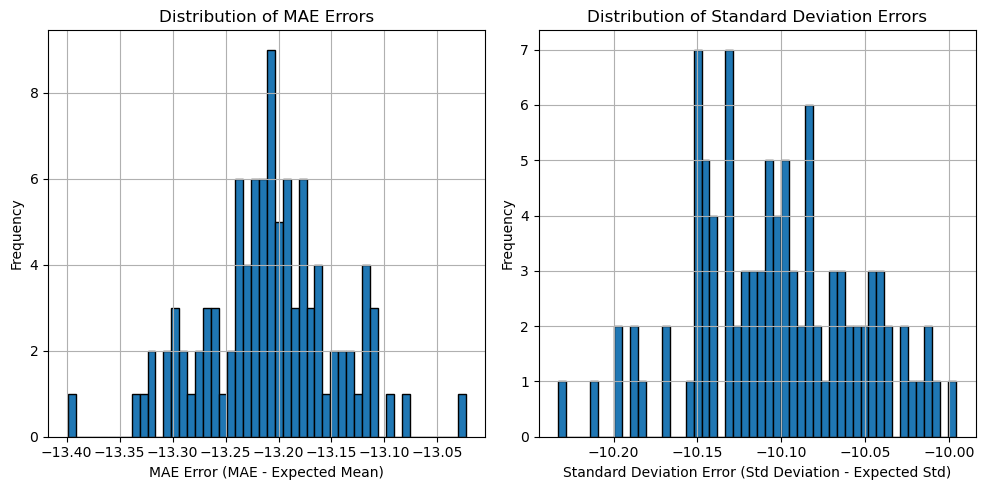

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty DataFrame (replace this with your actual DataFrame creation)
df = pd.DataFrame(np.random.randn(100, 1), columns=['new_trestbps'])

# Parameters
expected_mean = 14.0
expected_stdofmean = 10.7
num_iterations = 100

# Initialize lists to store errors for each iteration
mae_errors = []
std_errors = []

for _ in range(num_iterations):
    # Generate random data for 'new_trestbps' column (replace this with your actual data generation)
    df['new_trestbps'] = np.random.randn(100)

    # Calculate the mean of 'new_trestbps'
    mean_new_trestbps = df['new_trestbps'].mean()

    # Calculate the absolute differences for MAE
    df['abs_diffthresholding'] = df['new_trestbps'].apply(lambda x: abs(x - mean_new_trestbps))

    # Calculate the Mean Absolute Error (MAE)
    mae = df['abs_diffthresholding'].mean()
    mae_errors.append(mae)

    # Calculate the standard deviation
    std_deviation = df['abs_diffthresholding'].std()
    std_errors.append(std_deviation)

# Plot the errors for MAE and standard deviation in separate histograms
plt.figure(figsize=(10, 5))

# Plot MAE errors
plt.subplot(1, 2, 1)
plt.hist(np.array(mae_errors) - expected_mean, bins=50, edgecolor='black')
plt.xlabel('MAE Error (MAE - Expected Mean)')
plt.ylabel('Frequency')
plt.title('Distribution of MAE Errors')
plt.grid(True)

# Plot standard deviation errors
plt.subplot(1, 2, 2)
plt.hist(np.array(std_errors) - expected_stdofmean, bins=50, edgecolor='black')
plt.xlabel('Standard Deviation Error (Std Deviation - Expected Std)')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviation Errors')
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
